<a href="https://colab.research.google.com/github/houkaita/Estatistica/blob/main/C%C3%B3pia_de_GCC1518_T2_LUCAS_ROCHA_DE_OLIVEIRA_RODRIGUES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parte 1: Pima Indians Diabetes**


## **1.1 Carregamento do Conjunto de Dados**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pima_df = pd.read_csv('diabetes.csv')

pima_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **1.2 Exploração Inicial dos Dados**

In [3]:
pima_df.info()

pima_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **1.3 Análise Univariada**

### Distribuição das variaveis

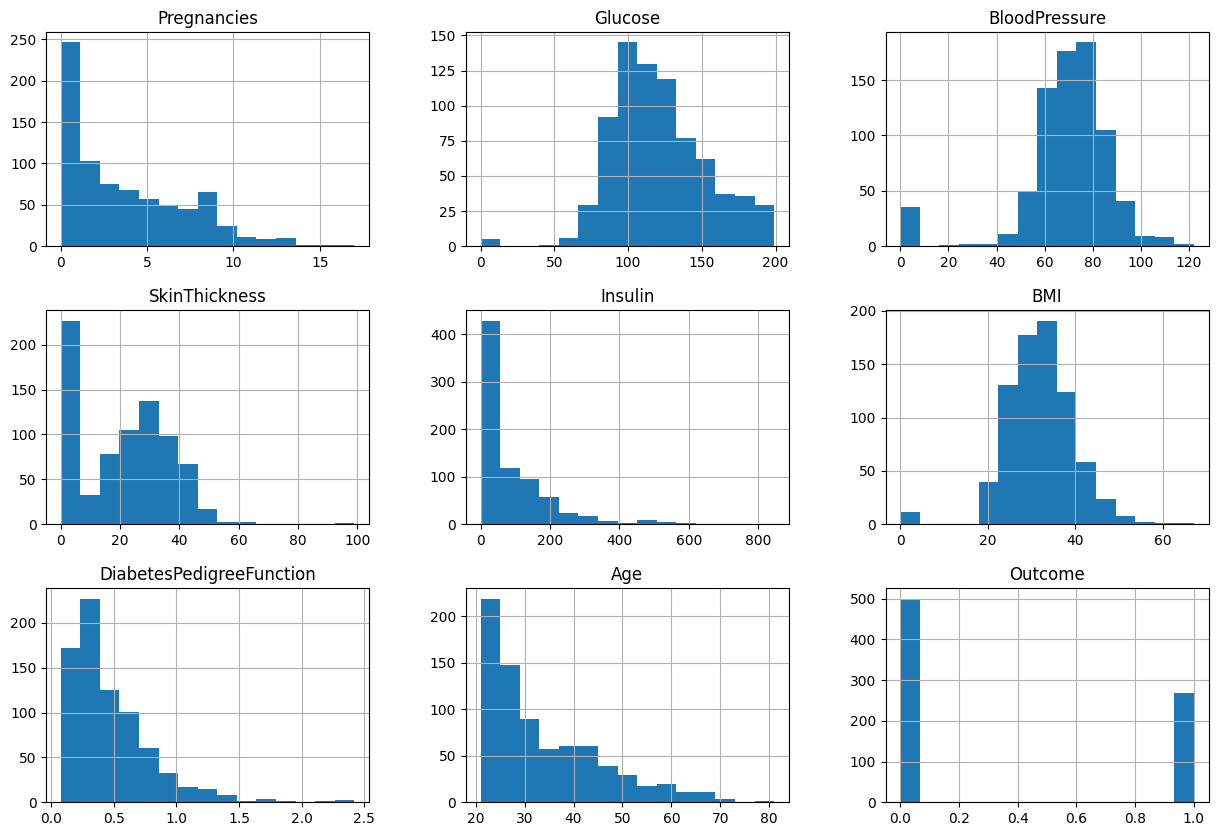

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [4]:
pima_df.hist(bins=15, figsize=(15, 10))
plt.show()

plt.figure(figsize=(12, 6))


**Algumas observações interessantes que podemos tirar desses gráficos**


1. A maioria das mulheres no conjunto de dados tem poucas gravidezes (0 a 2). Há um número menor de mulheres com mais de 10 gravidezes.
2.  A maioria dos valores está concentrada entre 0 e 40 mm, formando uma especie de curva normal. No entanto, há um número considerável de valores zero, o que pode indicar dados ausentes ou incorretos.
3. A maioria das pessoas tem um IMC entre 25 e 40, o que indica sobrepeso e obesidade.
4. A maioria dos participantes é jovem, a partir dos 20 anos, e conforme vai ficando mais velho mais raros são.



### Boxplots

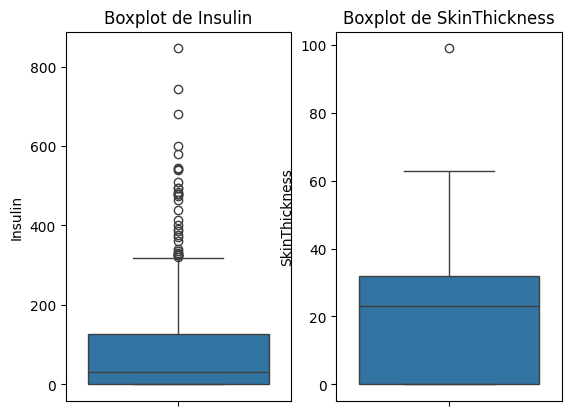

In [5]:
plt.subplot(1, 2, 1)
sns.boxplot(y=pima_df['Insulin'])
plt.title('Boxplot de Insulin')

plt.subplot(1, 2, 2)
sns.boxplot(y=pima_df['SkinThickness'])
plt.title('Boxplot de SkinThickness')

plt.show()

Observações:

A variável de SkinThickness parece ser um pouco mais constante que a variável de Insilina, ou seja muitos participantes estão em um nível similar, porém a variável de insulina possue muitos Outliers tornando mais dificil fazer uma analise considerando que existem muitos desvios do padrão.



## **1.4 Análise Bivariada**

### Correlação entre variáveis

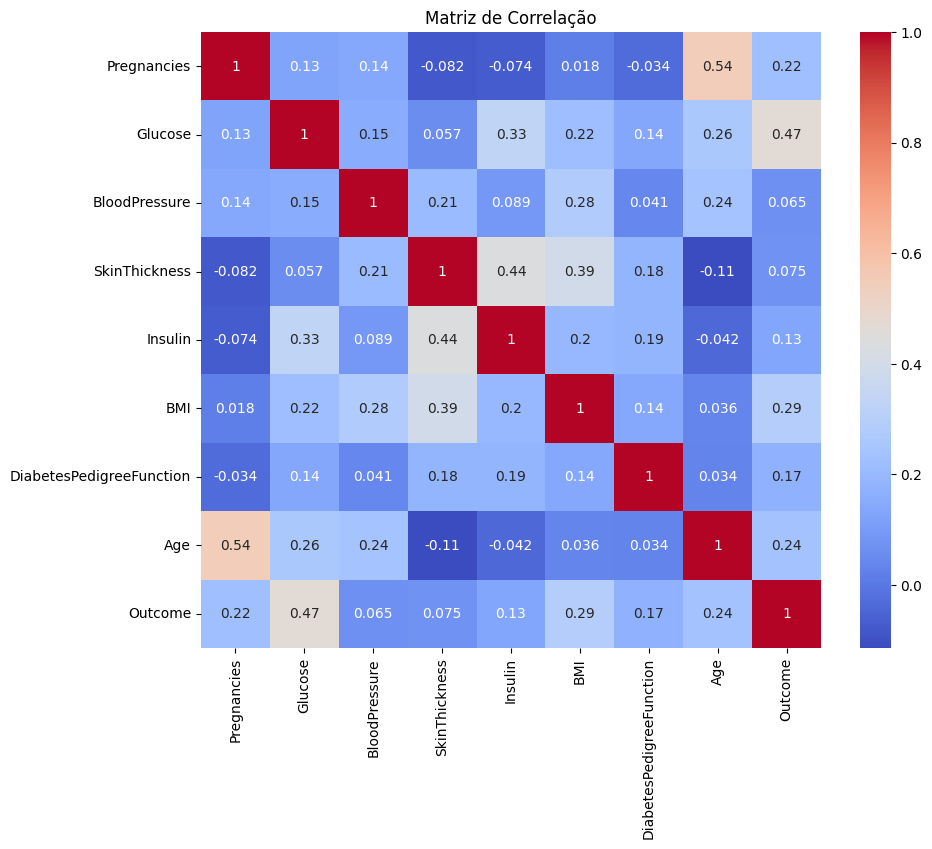

In [6]:
corr_matrix = pima_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


As variáveis que tem as maiores relações são:


1.   Age e Pregnancies 0.54
Indicando que pessoas mais velhas tendem a ter mais filhos

2.   Glucose e Outcome 0.47
Indicando que o nível de glicose indica diretamente se a pessoa é ou não diabetica.

Além da
3. Insulin e Skinthickness 0.44.
4. BMI e Skinthickness 0.39.
5. Insulin e Glucose 0.33.

### Gráficos de Dispersão

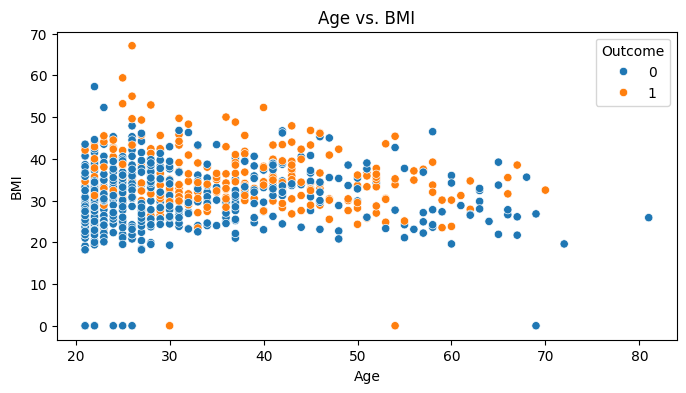

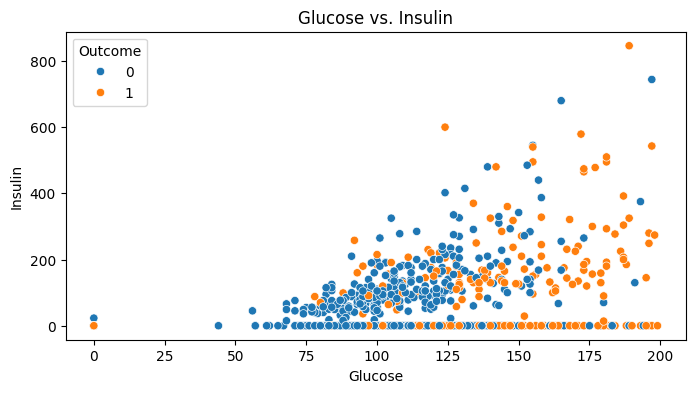

In [7]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Age', y='BMI', hue="Outcome", data=pima_df)
plt.title('Age vs. BMI')
plt.show()

plt.figure(figsize=(8, 4))
sns.scatterplot(x='Glucose', y='Insulin',  hue="Outcome", data=pima_df)
plt.title('Glucose vs. Insulin')
plt.show()


Em Age vs BMI vemos que tanto jovens quanto pesssoas mais velhas enfrentam a diabetes, porém quanto maior o BMI do individuo maior a chance de possuir diabetes.

Já em Glucose vs. Insulin vemos que quanto maior o nivel de glicose maior a chance de possuir diabetes porém o nível de insulina parece ter um efeito menor na indicação de ter ou não diabetes.

### Boxplot para Glucose por Categoria

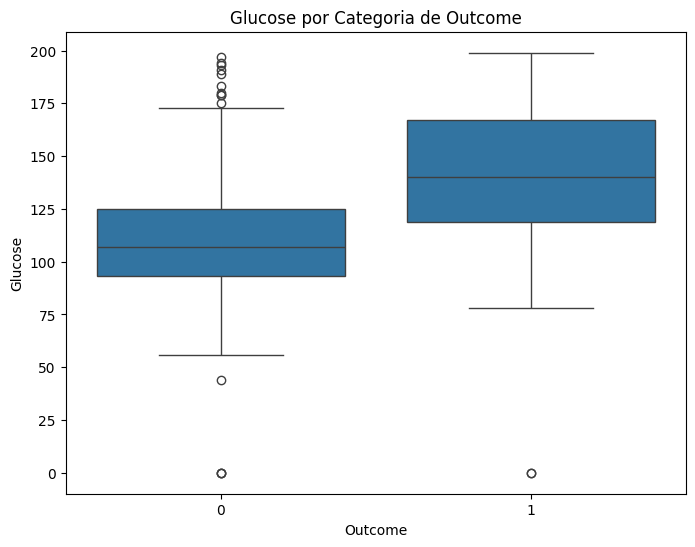

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=pima_df)
plt.title('Glucose por Categoria de Outcome')
plt.show()


Aqui vemos que praticamente todos os pacientes com excessão de 1 possuem glicose alta e tem diabetes.

Já entre as pessoas que não possuem há um desvio padrão maior mostrando que não necessáriamente a pessoa que tem glicose alta está diabetica porém é altamente comum entre pessoas com esse quadro.

## **1.5 Análise de Variáveis Categóricas**

Distribuição da Variável Alvo

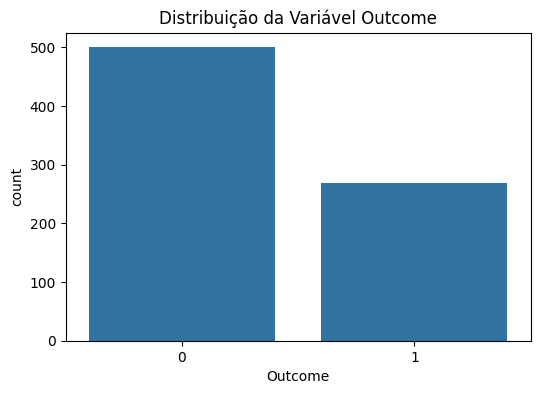

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=pima_df)
plt.title('Distribuição da Variável Outcome')
plt.show()

Comparação por Categoria

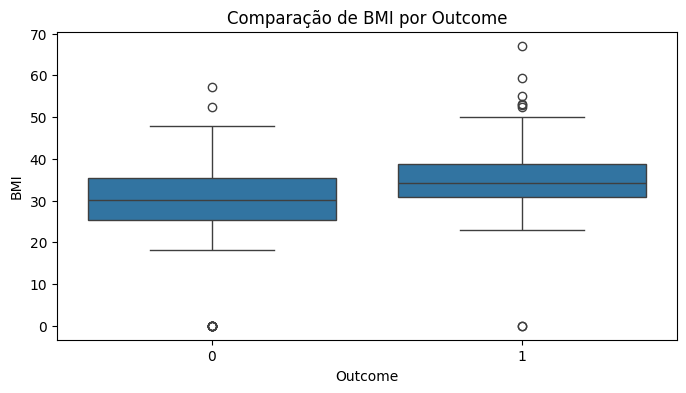

In [10]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Outcome', y='BMI', data=pima_df)
plt.title('Comparação de BMI por Outcome')
plt.show()

Aqui podemos analisar que a maioria das pessoas que está na média saúdavel de BMI tende a não ter diabetes, porém quem está a um nível de obsidade tem mais probabilidade de ter essa condição além de termos alguns outliers que estão extremamente acima do peso.

## **1.6 Faixas de Glicose**

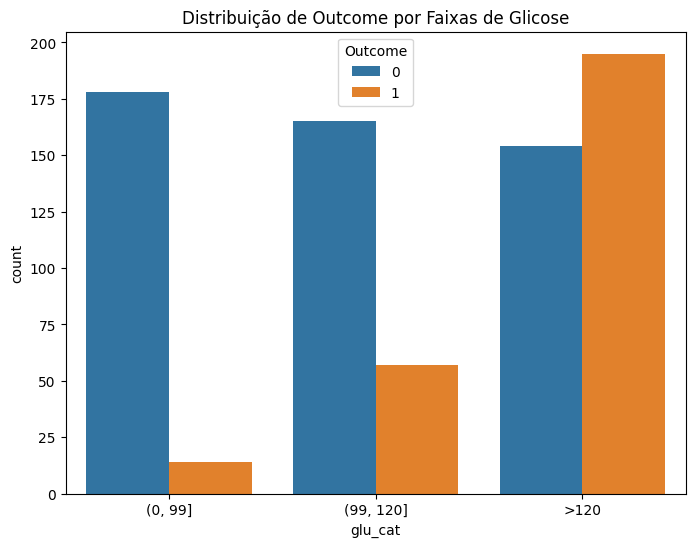

In [11]:
bins = [0, 99, 120, float('inf')]
labels = ['(0, 99]', '(99, 120]', '>120']

pima_df['glu_cat'] = pd.cut(pima_df['Glucose'], bins=bins, labels=labels, right=True, ordered=True)

plt.figure(figsize=(8, 6))
sns.countplot(x='glu_cat', hue='Outcome', data=pima_df)
plt.title('Distribuição de Outcome por Faixas de Glicose')
plt.show()


Da mesma forma podemos analisar a ligação direta entre nível de glicose e propensão a diabetes.

E ainda é possível ver que pessoas com nível baixo de glicose também possuem diabetes.

# **Parte 2: Adult Income**

## Carregar o Conjunto de Dados

In [12]:
adult_df = pd.read_csv('adult.csv')

adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [14]:
for col in adult_df.columns:
    if adult_df[col].dtype == object:
        adult_df[col] = adult_df[col].str.strip()

## Calcular a tabela de frequências esperadas

In [15]:
def get_expected_frequency_table(df):
    row_names = df.index
    column_names = df.columns
    expected_frequency_table = pd.DataFrame(index=row_names, columns=column_names)

    for row in row_names:
        for column in column_names:
            expected_frequency_table.loc[row, column] = (df.loc[row, 'All'] * df.loc['All', column]) / df.loc['All', 'All']

    return expected_frequency_table

## Calcular o qui-quadrado

In [16]:
def get_chi_square(contingency_table, expected_frequency_table):
    chi_square = 0

    for row in contingency_table.index:
        if row == 'All':
            continue
        for column in contingency_table.columns:
            if column == 'All':
                continue
            chi_square += ((contingency_table.loc[row, column] - expected_frequency_table.loc[row, column]) ** 2) / expected_frequency_table.loc[row, column]

    return chi_square

## Calcular o coeficiente V de Cramer

In [17]:
def get_cramer_v(chi_square, contingency_table):
    n = contingency_table.loc['All', 'All']
    min_dim = min(contingency_table.shape[0] - 2, contingency_table.shape[1] - 2)  # Subtrai 2 para remover margens
    cramer_v = np.sqrt(chi_square / (n * min_dim))
    return cramer_v

In [18]:
categorical_columns = adult_df.select_dtypes(include=[object]).columns
cramer_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns, dtype=float)

## Calcular associações categoricas

In [19]:
for col in categorical_columns:
    for col2 in categorical_columns:
        if col != col2:
            contingency_table = pd.crosstab(adult_df[col], adult_df[col2], margins=True)
            expected_frequency_table = get_expected_frequency_table(contingency_table)
            chi_square = get_chi_square(contingency_table, expected_frequency_table)
            cramer_v = get_cramer_v(chi_square, contingency_table)
            cramer_matrix.loc[col, col2] = cramer_v
            print(f'Associação entre {col} e {col2}:')
            print(f'Coeficiente V de Cramer: {cramer_v}')
            if cramer_v < 0.2:
                print('Associação Fraca')
            elif 0.2 <= cramer_v < 0.4:
                print('Associação Moderada')
            else:
                print('Associação Forte')

Associação entre workclass e education:
Coeficiente V de Cramer: 0.09998397800687149
Associação Fraca
Associação entre workclass e marital-status:
Coeficiente V de Cramer: 0.08546425026117453
Associação Fraca
Associação entre workclass e occupation:
Coeficiente V de Cramer: 0.40005008791183566
Associação Forte
Associação entre workclass e relationship:
Coeficiente V de Cramer: 0.10079346068407954
Associação Fraca
Associação entre workclass e race:
Coeficiente V de Cramer: 0.05830296507829204
Associação Fraca
Associação entre workclass e gender:
Coeficiente V de Cramer: 0.15178511502713807
Associação Fraca
Associação entre workclass e native-country:
Coeficiente V de Cramer: 0.0428145202556562
Associação Fraca
Associação entre workclass e income:
Coeficiente V de Cramer: 0.18160076368356623
Associação Fraca
Associação entre education e workclass:
Coeficiente V de Cramer: 0.09998397800687149
Associação Fraca
Associação entre education e marital-status:
Coeficiente V de Cramer: 0.09093291

## Visualização

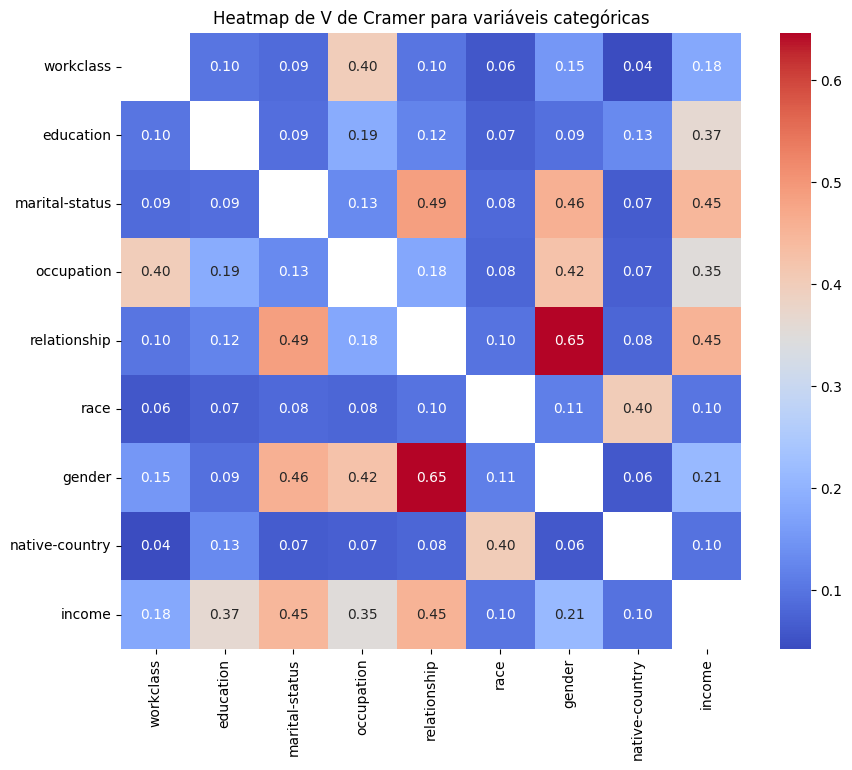

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(cramer_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de V de Cramer para variáveis categóricas')
plt.show()

Maiores relações

1.   Relationship e Gender (0.65), isso se da muito ao fato das váriaveis Husband e Wife serem diretamente relacionadas ao genêro da pessoa
2.   Relationship e Martial-Status (0.49), isso se da já que há uma forte relação entre ser unmarried e never-married ou Husband e married-civ-spouse entre outros

Porém os mais interessantes podemos ver são os relacionamentos com a variável income, vemos uma relação maior entre relationship e martial-status do que com educação e ocupação o que é um pouco contra intuitivo dizer que seu status civil diz mais sobre sua possível renda que sua ocupação por exemplo.

Também vemos que genêro e raça tem um papel não tao relevante com para dizer o quanto o individuo ganha, o que demonstra um avanço na sociedade dado os fatores históricos que envolvem a relação entre raça e genêro no ambiente de trabalho.

